In [1]:
import numpy as np
import pandas as pd
import requests
import re
import json
import time
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import os

# Pull all “major places” for each country and US state

## World

In [203]:
countries = pd.read_excel('countries_with_abbreviations.xlsx', index_col=0)

In [204]:
major_places_world = pd.read_csv('major_places_world.csv', index_col=0)

In [205]:
major_places_world = major_places_world.merge(countries, on='permalink', how='left')

In [206]:
major_places_world = major_places_world.drop_duplicates(subset=['major_place_name', 'major_place_link']).reset_index(drop=True)

In [207]:
major_places_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14665 entries, 0 to 14664
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   major_place_name  14665 non-null  object
 1   major_place_link  14665 non-null  object
 2   permalink         14665 non-null  object
 3   Country           14565 non-null  object
 4   Continent         14565 non-null  object
 5   Abbreviation      14522 non-null  object
dtypes: object(6)
memory usage: 687.5+ KB


In [208]:
major_places_world[pd.isna(major_places_world.Country)].permalink.unique()

array(['https://weatherspark.com/countries/GB/SCT'], dtype=object)

In [209]:
major_places_world['Country'].fillna(value='united kingdom', inplace=True)
major_places_world['Continent '].fillna(value='Europe', inplace=True)

In [210]:
major_places_world['major_place_link'] = major_places_world['major_place_link'].apply(lambda x: x.replace('https://weatherspark.com', '') if pd.notna(x) else x)

In [211]:
major_places_world

,major_place_name,major_place_link,permalink,Country,Continent,Abbreviation
0,Abovyan,/y/103429/Average-Weather-in-Abovyan-Armenia-Y...,https://weatherspark.com/countries/AM,armenia,Europe,AM
1,Agarak,/y/104077/Average-Weather-in-Agarak-Armenia-Ye...,https://weatherspark.com/countries/AM,armenia,Europe,AM
2,Aghavnatun,/y/103426/Average-Weather-in-Aghavnatun-Armeni...,https://weatherspark.com/countries/AM,armenia,Europe,AM
3,Akhuryan,/y/102827/Average-Weather-in-Akhuryan-Armenia-...,https://weatherspark.com/countries/AM,armenia,Europe,AM
4,Akunk’,/y/103830/Average-Weather-in-Akunk%E2%80%99-Ar...,https://weatherspark.com/countries/AM,armenia,Europe,AM
...,...,...,...,...,...,...
14660,Khawr Fakkān,/y/105545/Average-Weather-in-Khawr-Fakk%C4%81n...,https://weatherspark.com/countries/AE,united arab emirates,Middle East & Central Asia,AE
14661,Muzayri‘,/y/105282/Average-Weather-in-Muzayri%E2%80%98-...,https://weatherspark.com/countries/AE,united arab emirates,Middle East & Central Asia,AE
14662,Ras al-Khaimah,/y/105469/Average-Weather-in-Ras-al-Khaimah-Un...,https://weatherspark.com/countries/AE,united arab emirates,Middle East & Central Asia,AE
14663,Sharjah,/y/105471/Average-Weather-in-Sharjah-United-Ar...,https://weatherspark.com/countries/AE,united arab emirates,Middle East & Central Asia,AE


## US

In [70]:
us_states = pd.read_excel(folder_path + 'State and Territory Abbreviations.xlsx')
us_states['permalink'] = us_states['Postal'].apply(lambda x: 'https://weatherspark.com/countries/US/'+x)

In [71]:
major_places_us = pd.read_csv('major_places_us.csv', index_col=0)

In [72]:
major_places_us = major_places_us.merge(us_states, on='permalink', how='left')

In [74]:
major_places_us = major_places_us.drop_duplicates(subset=['major_place_name', 'major_place_link']).reset_index(drop=True)

In [75]:
major_places_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5183 entries, 0 to 5182
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   permalink         5183 non-null   object
 1   major_place_link  5183 non-null   object
 2   major_place_name  5183 non-null   object
 3   State             5183 non-null   object
 4   Postal            5183 non-null   object
dtypes: object(5)
memory usage: 202.6+ KB


In [76]:
major_places_us

,permalink,major_place_link,major_place_name,State,Postal
0,https://weatherspark.com/countries/US/AL,/y/14608/Average-Weather-in-Alabaster-Alabama-...,Alabaster,Alabama,AL
1,https://weatherspark.com/countries/US/AL,/y/14639/Average-Weather-in-Albertville-Alabam...,Albertville,Alabama,AL
2,https://weatherspark.com/countries/US/AL,/y/15044/Average-Weather-in-Alexander-City-Ala...,Alexander City,Alabama,AL
3,https://weatherspark.com/countries/US/AL,/y/14515/Average-Weather-in-Andalusia-Alabama-...,Andalusia,Alabama,AL
4,https://weatherspark.com/countries/US/AL,/y/15070/Average-Weather-in-Anniston-Alabama-U...,Anniston,Alabama,AL
...,...,...,...,...,...
5178,https://weatherspark.com/countries/US/TX,/y/7983/Average-Weather-in-Victoria-Texas-Unit...,Victoria,Texas,TX
5179,https://weatherspark.com/countries/US/TX,/y/8079/Average-Weather-in-Waco-Texas-United-S...,Waco,Texas,TX
5180,https://weatherspark.com/countries/US/TX,/y/7956/Average-Weather-in-Weslaco-Texas-Unite...,Weslaco,Texas,TX
5181,https://weatherspark.com/countries/US/TX,/y/7193/Average-Weather-in-Wichita-Falls-Texas...,Wichita Falls,Texas,TX


# Scrape weather data

## Useful functions

In [180]:
def convert_path_to_coords(path):
    z = path.get('d').replace('Z','').split('l')
    start = np.array([int(o) for o in z[0][1:].split(',')])
    moves = np.array([[0,0]] + [[int(i) for i in o.split(',')] for o in z[1:]])
    return moves.cumsum(axis=0) + start

def get_muggiest_day(coords_set):
    df = pd.DataFrame([coords[:,1] for coords in coords_set]).transpose()
    return df.sort_values([2,0,4,3,1,5]).index[0]

def interpret_coords(coords_set):
    min_value = min([coords[:,1].min() for coords in coords_set])
    max_value = max([coords[:,1].max() for coords in coords_set])
    for i in range(len(coords_set)):
        coords_set[i] = np.flip(coords_set[i][365:],axis=0)
        
    res = dict()
    
    res['top_values'] = [(max_value - coords[:,1].min()) / (max_value - min_value) for coords in coords_set]
    
    muggiest_day = get_muggiest_day(coords_set)
    res['muggiest_day'] = muggiest_day
    
    muggiest_day_values = [coords[muggiest_day,1] for coords in coords_set]
    res['muggiest_day_values'] = [(max_value - x) / (max_value - min_value) for x in muggiest_day_values]
    
    return res
    
def process_weatherspark(url, sleep_time=1):
    res = dict()
    time.sleep(sleep_time)
    response = requests.get(url)
    response.encoding = 'utf-8'
    page = response.text
    soup = BeautifulSoup(page)
    
    sidebar = soup.find('div',{'id':'Sidebar-Container'})
    res['name'] = sidebar.find('h4').get_text(strip=True)
    res['parents'] = [a.get_text(strip=True) for a in sidebar.find_all('a', recursive=False)]
    
    svg = soup.find('a', {'id':'Figures-Humidity'}).findNextSibling().find('svg')
    paths = svg.find_all('path')
    coords_set = [convert_path_to_coords(path) for path in paths[:6]]
    res['from_chart'] = interpret_coords(coords_set)
    res['from_labels'] = np.array(
        [int(text.text.replace('%',''))/100 for text in svg.find_all('text') if (text.get('text-anchor')=='middle') and '%' in text.text]
    ).max()
    return res

def flatten(d):
    res = dict()
    res['city'] = d['name']
    try:
        res['region'] = d['parents'][-2]
    except:
        res['region'] = ''
    res['country'] = d['parents'][-1]
    for i in range(6):
        res['top_value_{}'.format(i)] = d['from_chart']['top_values'][i]
    for i in range(6):
        res['muggiest_day_value_{}'.format(i)] = d['from_chart']['muggiest_day_values'][i]
    res['label_value'] = d['from_labels']
    res['muggiest_day'] = d['from_chart']['muggiest_day']
    return res

def interpret_coords(coords_set, humid_coord):
    min_value = min([coords[:,1].min() for coords in coords_set])
    max_value = max([coords[:,1].max() for coords in coords_set])
    coords = np.flip(humid_coord[365:],axis=0)
    values = [(max_value - x) / (max_value - min_value) for x in coords[:,1]]
    return values

def calculate_total_weather_time(humid_days):

    # Summing the percentages of all humid days
    total_humid_time = sum(humid_days) 

    # Total time humid or above (as a percentage of a year) 
    total_humid_time_percentage = (total_humid_time / len(humid_days)) * 100
    
    return total_humid_time_percentage

In [178]:
def save_page(soup, url, folder="/Users/anna.zemit/Desktop/Programming/2024/6. The Global and American Cities With the Driest Air/saved_pages/"):
    
    # Create the folder if it doesn't exist
    if not os.path.exists(folder):
        os.makedirs(folder)

    # Create a file name based on the URL
    file_name = os.path.join(folder, url.replace("://", "_").replace("/", "_").replace(".", "_") + ".html")

    # Open the file in write mode
    with open(file_name, "w", encoding="utf-8") as file:
        # Write the HTML content to the file
        file.write(str(soup))

## Experiment

In [154]:
url = 'https://weatherspark.com' + '/y/143809/Average-Weather-in-Tokyo-Japan-Year-Round'

In [156]:
res = dict()

In [157]:
response = requests.get(url)
response.encoding = 'utf-8'
time.sleep(5)
page = response.text
soup = BeautifulSoup(page)
    
sidebar = soup.find('div',{'id':'Sidebar-Container'})
res['name'] = sidebar.find('h4').get_text(strip=True)
res['parents'] = [a.get_text(strip=True) for a in sidebar.find_all('a', recursive=False)]
    
svg = soup.find('a', {'id':'Figures-Humidity'}).findNextSibling().find('svg')
paths = svg.find_all('path')
coords_set = [convert_path_to_coords(path) for path in paths[:6]]

In [166]:
miserable_days = calculate_total_humid_time(interpret_humid(coords_set, coords_set[0]))
miserable_days

1.4352337036260754

In [168]:
oppressive_days = calculate_total_humid_time(interpret_humid(coords_set, coords_set[1]))
oppressive_days

12.407776147558167

In [169]:
muggy_days = calculate_total_humid_time(interpret_humid(coords_set, coords_set[2]))
muggy_days

21.912282540347945

In [170]:
humid_days = calculate_total_humid_time(interpret_humid(coords_set, coords_set[3]))
humid_days

31.43963529658353

In [171]:
comfortable_days = calculate_total_humid_time(interpret_humid(coords_set, coords_set[4]))
comfortable_days

40.55963110459026

In [165]:
calculate_total_humid_time(interpret_humid(coords_set, coords_set[5]))

99.72353804233907

In [145]:
coords_set_1 = coords_set[0]
coords_set_2 = coords_set[1]
coords_set_3 = coords_set[2]
coords_set_4 = coords_set[3]
coords_set_5 = coords_set[4]
coords_set_6 = coords_set[5]

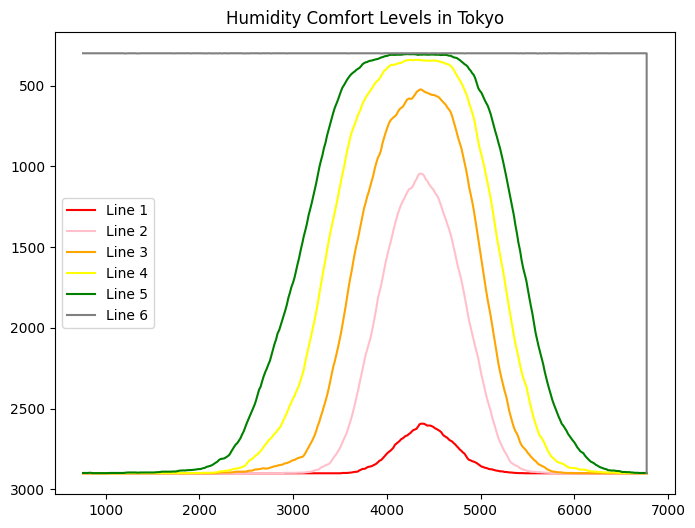

In [176]:
# Create a list of colors for each line
colors = ['red', 'pink', 'orange', 'yellow', 'green', 'grey']

# Plot each line with a different color
plt.figure(figsize=(8, 6))  # Adjust figure size if needed

for i, coords_set in enumerate([coords_set_1, coords_set_2, coords_set_3, coords_set_4, coords_set_5, coords_set_6]):
    x, y = zip(*coords_set)
    plt.plot(x, y, label=f'Line {i + 1}', color=colors[i])

# Invert the y-axis
plt.gca().invert_yaxis()

# Add labels, legend, and title
plt.legend()
plt.title('Humidity Comfort Levels in Tokyo')

# Show the plot
plt.show()

In [173]:
# % of dry days:
calculate_total_humid_time(interpret_humid(coords_set, coords_set[5])) - comfortable_days

59.16390693774881

In [174]:
# Convert %’s into “dry days”:
365 * 0.5916390693774881

215.94826032278317

## Scraper

### World

In [234]:
for index, row in major_places_world[18:].iterrows(): 
    
    if pd.isna(row['dry_days']):
        url = 'https://weatherspark.com' + row['major_place_link']
        json_name = row['major_place_name']
        res = dict()

        try: 
            response = requests.get(url)
            response.encoding = 'utf-8'
            time.sleep(5)
            page = response.text
            soup = BeautifulSoup(page)
            save_page(soup, url)

            sidebar = soup.find('div',{'id':'Sidebar-Container'})
            res['name'] = sidebar.find('h4').get_text(strip=True)
            res['parents'] = [a.get_text(strip=True) for a in sidebar.find_all('a', recursive=False)]

            svg = soup.find('a', {'id':'Figures-Humidity'}).findNextSibling().find('svg')
            paths = svg.find_all('path')
            coords_set = [convert_path_to_coords(path) for path in paths[:6]]

            # Humid comfortable percentages
            comfortable_days = calculate_total_weather_time(interpret_coords(coords_set, coords_set[4]))

            dry_time = calculate_total_weather_time(interpret_coords(coords_set, coords_set[5])) - comfortable_days

            dry_days = 365 * (dry_time/100)

            major_places_world.at[index, 'dry_days'] = dry_days

            major_places_world.to_csv('scraped_major_places_world.csv', index=False)

            print('Done ', index)

        except:

            print('Exception ', url)

Done  5958
Done  11014
Done  12144
Done  13009
Done  13072
Done  13765
Done  13766
Done  13816
Done  13817
Done  13818
Done  13825
Done  13883
Done  13884
Done  13942
Done  13965
Exception  https://weatherspark.com/countries/AU/01
Exception  https://weatherspark.com/countries/AU/02
Exception  https://weatherspark.com/countries/AU/03
Exception  https://weatherspark.com/countries/AU/04
Exception  https://weatherspark.com/countries/AU/05
Exception  https://weatherspark.com/countries/AU/06
Exception  https://weatherspark.com/countries/AU/07
Exception  https://weatherspark.com/countries/AU/08
Done  14078
Done  14131
Done  14132
Done  14139
Done  14159
Done  14161
Done  14188
Done  14189
Done  14276
Done  14277


In [246]:
major_places_world.dropna(subset=['dry_days'], inplace=True)

In [247]:
major_places_world.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14657 entries, 0 to 14664
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   major_place_name  14657 non-null  object 
 1   major_place_link  14657 non-null  object 
 2   permalink         14657 non-null  object 
 3   Country           14657 non-null  object 
 4   Continent         14657 non-null  object 
 5   Abbreviation      14514 non-null  object 
 6   dry_days          14657 non-null  float64
dtypes: float64(1), object(6)
memory usage: 916.1+ KB


In [279]:
major_places_world['Country'] = major_places_world['Country'].apply(lambda x: x.title())

In [297]:
major_places_world = pd.read_csv('Raw Data World.csv')

In [298]:
major_places_world

,Continent,Country,dry_days,major_place_name,major_place_link,permalink,Abbreviation
0,South America,Peru,365.0,Ayacucho,/y/23257/Average-Weather-in-Ayacucho-Peru-Year...,https://weatherspark.com/countries/PE,PE
1,South America,Peru,365.0,Ayaviri,/y/26623/Average-Weather-in-Ayaviri-Peru-Year-...,https://weatherspark.com/countries/PE,PE
2,South America,Peru,365.0,Cerro de Pasco,/y/21357/Average-Weather-in-Cerro-de-Pasco-Per...,https://weatherspark.com/countries/PE,PE
3,South America,Peru,365.0,Chaupimarca,/y/21356/Average-Weather-in-Chaupimarca-Peru-Y...,https://weatherspark.com/countries/PE,PE
4,South America,Peru,365.0,Cusco,/y/25926/Average-Weather-in-Cusco-Peru-Year-Round,https://weatherspark.com/countries/PE,PE
...,...,...,...,...,...,...,...
14652,Rest of Asia and Oceania,Nauru,0.0,Baiti,/y/144762/Average-Weather-in-Baiti-Nauru-Year-...,https://weatherspark.com/countries/NR,NR
14653,Rest of Asia and Oceania,Nauru,0.0,Ijuw,/y/144763/Average-Weather-in-Ijuw-Nauru-Year-R...,https://weatherspark.com/countries/NR,NR
14654,Rest of Asia and Oceania,Nauru,0.0,Uaboe,/y/144761/Average-Weather-in-Uaboe-Nauru-Year-...,https://weatherspark.com/countries/NR,NR
14655,Rest of Asia and Oceania,Nauru,0.0,Yangor,/y/144760/Average-Weather-in-Yangor-Nauru-Year...,https://weatherspark.com/countries/NR,NR


### US

In [242]:
for index, row in major_places_us[1:].iterrows(): 
    
    if pd.isna(row['dry_days']):
    
        url = 'https://weatherspark.com' + row['major_place_link']
        json_name = row['major_place_name']
        res = dict()

        try: 
            response = requests.get(url)
            response.encoding = 'utf-8'
            time.sleep(5)
            page = response.text
            soup = BeautifulSoup(page)
            save_page(soup, url)

            sidebar = soup.find('div',{'id':'Sidebar-Container'})
            res['name'] = sidebar.find('h4').get_text(strip=True)
            res['parents'] = [a.get_text(strip=True) for a in sidebar.find_all('a', recursive=False)]

            svg = soup.find('a', {'id':'Figures-Humidity'}).findNextSibling().find('svg')
            paths = svg.find_all('path')
            coords_set = [convert_path_to_coords(path) for path in paths[:6]]

            # Humid comfortable percentages
            comfortable_days = calculate_total_weather_time(interpret_coords(coords_set, coords_set[4]))

            dry_time = calculate_total_weather_time(interpret_coords(coords_set, coords_set[5])) - comfortable_days

            dry_days = 365 * (dry_time/100)

            major_places_us.at[index, 'dry_days'] = dry_days

            major_places_us.to_csv('scraped_major_places_us.csv', index=False)

            print('Done ', index)

        except:

            print('Exception ', url)

Exception  https://weatherspark.com/countries/AU/01
Exception  https://weatherspark.com/countries/AU/02
Exception  https://weatherspark.com/countries/AU/03
Exception  https://weatherspark.com/countries/AU/04
Exception  https://weatherspark.com/countries/AU/05
Exception  https://weatherspark.com/countries/AU/06
Exception  https://weatherspark.com/countries/AU/07
Exception  https://weatherspark.com/countries/AU/08
Done  1290
Done  1291
Done  1319
Done  3464
Done  3472
Done  3473


In [250]:
major_places_us.dropna(subset=['dry_days'], inplace=True)

In [251]:
major_places_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5175 entries, 0 to 5182
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   permalink         5175 non-null   object 
 1   major_place_link  5175 non-null   object 
 2   major_place_name  5175 non-null   object 
 3   State             5175 non-null   object 
 4   Postal            5175 non-null   object 
 5   dry_days          5175 non-null   float64
dtypes: float64(1), object(5)
memory usage: 283.0+ KB


In [299]:
major_places_us = pd.read_csv('Raw Data States.csv')

In [300]:
major_places_us

,State,major_place_name,dry_days,permalink,major_place_link,Postal
0,Alaska,Sutton-Alpine,364.96,https://weatherspark.com/countries/US/AK,/y/264/Average-Weather-in-Sutton-Alpine-Alaska...,AK
1,Alaska,Lazy Mountain,364.94,https://weatherspark.com/countries/US/AK,/y/265/Average-Weather-in-Lazy-Mountain-Alaska...,AK
2,Colorado,Aspen,364.90,https://weatherspark.com/countries/US/CO,/y/3360/Average-Weather-in-Aspen-Colorado-Unit...,CO
3,Alaska,Barrow,364.87,https://weatherspark.com/countries/US/AK,/y/163/Average-Weather-in-Barrow-Alaska-United...,AK
4,Colorado,Estes Park,364.85,https://weatherspark.com/countries/US/CO,/y/3564/Average-Weather-in-Estes-Park-Colorado...,CO
...,...,...,...,...,...,...
5170,Hawaii,Marine Corps Base Hawaii - MCBH,4.55,https://weatherspark.com/countries/US/HI,/y/118/Average-Weather-in-Marine-Corps-Base-Ha...,HI
5171,Hawaii,Waimānalo Beach,4.51,https://weatherspark.com/countries/US/HI,/y/133/Average-Weather-in-Waim%C4%81nalo-Beach...,HI
5172,Hawaii,Kapaau,4.46,https://weatherspark.com/countries/US/HI,/y/187/Average-Weather-in-Kapaau-Hawaii-United...,HI
5173,Hawaii,Hāwī,4.31,https://weatherspark.com/countries/US/HI,/y/190/Average-Weather-in-H%C4%81w%C4%AB-Hawai...,HI


# Finalise the data into tabs

## World Map

Isolate the city with the most dry days in every country.

In [301]:
world_map = major_places_world.loc[major_places_world.groupby('Country')['dry_days'].idxmax()]

In [302]:
world_map.drop(columns=['permalink', 'Abbreviation'], inplace=True)

In [303]:
world_map

,Continent,Country,dry_days,major_place_name,major_place_link
14,Middle East & Central Asia,Afghanistan,365.000000,Ashkāsham,/y/107194/Average-Weather-in-Ashk%C4%81sham-Af...
2364,Europe,Albania,326.990000,Ersekë,/y/85525/Average-Weather-in-Ersek%C3%AB-Albani...
382,Africa,Algeria,361.510000,Tamanrasset,/y/51498/Average-Weather-in-Tamanrasset-Algeri...
6584,Africa,Angola,247.780000,Lubango,/y/74188/Average-Weather-in-Lubango-Angola-Yea...
13644,North America,Antigua And Barbuda,0.011891,All Saints,/y/28731/Average-Weather-in-All-Saints-Antigua...
...,...,...,...,...,...
9462,Rest of Asia and Oceania,Vietnam,131.130000,Sa Pá,/y/114832/Average-Weather-in-Sa-P%C3%A1-Vietna...
1621,Europe,Wales,336.810000,Newtown,/y/37862/Average-Weather-in-Newtown-United-Kin...
651,Middle East & Central Asia,Yemen,355.940000,Saḩar,/y/103164/Average-Weather-in-Sa%E1%B8%A9ar-Yem...
7853,Africa,Zambia,206.890000,Choma,/y/92880/Average-Weather-in-Choma-Zambia-Year-...


## States Map

States Map: isolate the city with the most dry days in every state


In [304]:
states_map = major_places_us.loc[major_places_us.groupby('State')['dry_days'].idxmax()]

In [305]:
states_map.drop(columns=['permalink', 'Postal'], inplace=True)

In [306]:
states_map

,State,major_place_name,dry_days,major_place_link
4084,Alabama,Fort Payne,207.40,/y/15100/Average-Weather-in-Fort-Payne-Alabama...
0,Alaska,Sutton-Alpine,364.96,/y/264/Average-Weather-in-Sutton-Alpine-Alaska...
421,Arizona,Kayenta,358.20,/y/2882/Average-Weather-in-Kayenta-Arizona-Uni...
3882,Arkansas,Siloam Springs,221.46,/y/9757/Average-Weather-in-Siloam-Springs-Arka...
409,California,Lancaster,358.43,/y/1701/Average-Weather-in-Lancaster-Californi...
2,Colorado,Aspen,364.90,/y/3360/Average-Weather-in-Aspen-Colorado-Unit...
1801,Connecticut,Winchester Center,281.34,/y/24751/Average-Weather-in-Winchester-Center-...
3325,Delaware,Greenville,241.37,/y/22750/Average-Weather-in-Greenville-Delawar...
3544,District of Columbia,Chevy Chase,233.80,/y/20953/Average-Weather-in-Chevy-Chase;-Washi...
4787,Florida,Tallahassee,138.66,/y/15552/Average-Weather-in-Tallahassee-Florid...


## US

US: isolate the 20 cities with the most dry days in the U.S.

In [307]:
us = major_places_us.sort_values(by='dry_days', ascending=False).head(20)

In [308]:
us.drop(columns=['permalink', 'Postal'], inplace=True)

In [309]:
us

,State,major_place_name,dry_days,major_place_link
0,Alaska,Sutton-Alpine,364.96,/y/264/Average-Weather-in-Sutton-Alpine-Alaska...
1,Alaska,Lazy Mountain,364.94,/y/265/Average-Weather-in-Lazy-Mountain-Alaska...
2,Colorado,Aspen,364.90,/y/3360/Average-Weather-in-Aspen-Colorado-Unit...
3,Alaska,Barrow,364.87,/y/163/Average-Weather-in-Barrow-Alaska-United...
4,Colorado,Estes Park,364.85,/y/3564/Average-Weather-in-Estes-Park-Colorado...
5,Colorado,Edwards,364.83,/y/3364/Average-Weather-in-Edwards-Colorado-Un...
6,Montana,Big Sky,364.82,/y/2771/Average-Weather-in-Big-Sky-Montana-Uni...
7,Alaska,Fritz Creek,364.82,/y/211/Average-Weather-in-Fritz-Creek-Alaska-U...
8,Alaska,Diamond Ridge,364.76,/y/210/Average-Weather-in-Diamond-Ridge-Alaska...
9,Idaho,Sun Valley,364.68,/y/2325/Average-Weather-in-Sun-Valley-Idaho-Un...


## North America

North America: the 10 cities with the most dry days in this continent. Country column.

In [310]:
north_america = major_places_world[major_places_world['Continent '] == 'North America'].reset_index(drop=True)
north_america = north_america.sort_values(by='dry_days', ascending=False).head(10)

In [311]:
north_america.drop(columns=['permalink', 'Abbreviation', 'Continent '], inplace=True)

In [312]:
north_america

,Country,dry_days,major_place_name,major_place_link
0,United States Of America,363.91,Reno,/y/1548/Average-Weather-in-Reno-Nevada-United-...
1,Mexico,361.40,Cuajimalpa,/y/5668/Average-Weather-in-Cuajimalpa-Mexico-Y...
2,United States Of America,360.93,Anchorage,/y/252/Average-Weather-in-Anchorage-Alaska-Uni...
3,Canada,360.09,Prince George,/y/1016/Average-Weather-in-Prince-George-Canad...
4,Canada,359.86,Calgary,/y/2349/Average-Weather-in-Calgary-Canada-Year...
5,Mexico,359.61,Nicolás Romero,/y/5641/Average-Weather-in-Nicol%C3%A1s-Romero...
6,Mexico,359.44,Ciudad López Mateos,/y/5685/Average-Weather-in-Ciudad-L%C3%B3pez-M...
7,Mexico,357.42,Naucalpan de Juárez,/y/5642/Average-Weather-in-Naucalpan-de-Ju%C3%...
8,Mexico,356.95,Buenavista,/y/5835/Average-Weather-in-Buenavista-Mexico-Y...
9,Canada,356.88,Kamloops,/y/1421/Average-Weather-in-Kamloops-Canada-Yea...


## Europe

Europe: the 10 cities with the most dry days in this continent. Country column.

In [313]:
europe = major_places_world[major_places_world['Continent '] == 'Europe'].reset_index(drop=True)
europe = europe.sort_values(by='dry_days', ascending=False).head(10)
europe.drop(columns=['permalink', 'Abbreviation', 'Continent '], inplace=True)
europe

,Country,dry_days,major_place_name,major_place_link
0,Iceland,364.86,Laugar,/y/31553/Average-Weather-in-Laugar-Iceland-Yea...
1,Iceland,364.83,Ísafjörður,/y/31487/Average-Weather-in-%C3%8Dsafj%C3%B6r%...
2,Iceland,364.74,Neskaupstaður,/y/31824/Average-Weather-in-Neskaupsta%C3%B0ur...
3,Iceland,364.73,Vestmannaeyjar,/y/31509/Average-Weather-in-Vestmannaeyjar-Ice...
4,Iceland,364.72,Sauðárkrókur,/y/31511/Average-Weather-in-Sau%C3%B0%C3%A1rkr...
5,Iceland,364.71,Ólafsvík,/y/31486/Average-Weather-in-%C3%93lafsv%C3%ADk...
6,Iceland,364.67,Hveragerði,/y/31505/Average-Weather-in-Hverager%C3%B0i-Ic...
7,Iceland,364.66,Þorlákshöfn,/y/31500/Average-Weather-in-%C3%9Eorl%C3%A1ksh...
8,Iceland,364.65,Húsavík,/y/31554/Average-Weather-in-H%C3%BAsav%C3%ADk-...
9,Iceland,364.65,Borgarnes,/y/31508/Average-Weather-in-Borgarnes-Iceland-...


## South America

South America:  the 10 cities with the most dry days in this continent. Country column.

In [314]:
south_america = major_places_world[major_places_world['Continent '] == 'South America'].reset_index(drop=True)
south_america = south_america.sort_values(by='dry_days', ascending=False).head(10)
south_america.drop(columns=['permalink', 'Abbreviation', 'Continent '], inplace=True)
south_america

,Country,dry_days,major_place_name,major_place_link
0,Peru,365.0,Ayacucho,/y/23257/Average-Weather-in-Ayacucho-Peru-Year...
24,Bolivia,365.0,Huachacalla,/y/27341/Average-Weather-in-Huachacalla-Bolivi...
26,Bolivia,365.0,Huarina,/y/27350/Average-Weather-in-Huarina-Bolivia-Ye...
27,Bolivia,365.0,Huatajata,/y/27349/Average-Weather-in-Huatajata-Bolivia-...
28,Bolivia,365.0,La Paz,/y/27348/Average-Weather-in-La-Paz-Bolivia-Yea...
29,Bolivia,365.0,Lahuachaca,/y/27513/Average-Weather-in-Lahuachaca-Bolivia...
30,Bolivia,365.0,Llallagua,/y/27666/Average-Weather-in-Llallagua-Bolivia-...
31,Bolivia,365.0,Machacamarca,/y/27509/Average-Weather-in-Machacamarca-Boliv...
32,Bolivia,365.0,Maragua,/y/27975/Average-Weather-in-Maragua-Bolivia-Ye...
33,Bolivia,365.0,Patacamaya,/y/27511/Average-Weather-in-Patacamaya-Bolivia...


## Asia

Asia: the 10 cities with the most dry days in this continent. Country column.

In [315]:
asia = major_places_world[major_places_world['Continent '] == 'Middle East & Central Asia'].reset_index(drop=True)
asia = asia.sort_values(by='dry_days', ascending=False).head(10)
asia.drop(columns=['permalink', 'Abbreviation', 'Continent '], inplace=True)
asia

,Country,dry_days,major_place_name,major_place_link
0,Afghanistan,365.0,Ashkāsham,/y/107194/Average-Weather-in-Ashk%C4%81sham-Af...
6,Kyrgyzstan,365.0,Baetovo,/y/108093/Average-Weather-in-Baetovo-Kyrgyzsta...
9,Tajikistan,365.0,Murghob,/y/107776/Average-Weather-in-Murghob-Tajikista...
8,Kyrgyzstan,365.0,Naryn,/y/108438/Average-Weather-in-Naryn-Kyrgyzstan-...
7,Kyrgyzstan,365.0,Chayek,/y/108092/Average-Weather-in-Chayek-Kyrgyzstan...
1,Afghanistan,365.0,Fayrōz Kōh,/y/106309/Average-Weather-in-Fayr%C5%8Dz-K%C5%...
5,Kyrgyzstan,365.0,At-Bashi,/y/108439/Average-Weather-in-At-Bashi-Kyrgyzst...
2,Afghanistan,365.0,Jurm,/y/107031/Average-Weather-in-Jurm-Afghanistan-...
4,Afghanistan,365.0,Shahrak,/y/106248/Average-Weather-in-Shahrak-Afghanist...
3,Afghanistan,365.0,Khandūd,/y/107428/Average-Weather-in-Khand%C5%ABd-Afgh...


## Oceania

Oceania: the 10 cities with the most dry days in this continent. Country column.

In [316]:
oceania = major_places_world[major_places_world['Continent '] == 'Rest of Asia and Oceania'].reset_index(drop=True)
oceania = oceania.sort_values(by='dry_days', ascending=False).head(10)
oceania.drop(columns=['permalink', 'Abbreviation', 'Continent '], inplace=True)
oceania

,Country,dry_days,major_place_name,major_place_link
0,Mongolia,365.00,Duut,/y/112029/Average-Weather-in-Duut-Mongolia-Yea...
4,Mongolia,365.00,Tsenher,/y/112123/Average-Weather-in-Tsenher-Mongolia-...
5,Mongolia,365.00,Ulaan Khat,/y/111818/Average-Weather-in-Ulaan-Khat-Mongol...
1,Mongolia,365.00,Jargalant,/y/112027/Average-Weather-in-Jargalant-Mongoli...
3,Mongolia,365.00,Tolbo,/y/111937/Average-Weather-in-Tolbo-Mongolia-Ye...
2,Mongolia,365.00,Rashaant,/y/111936/Average-Weather-in-Rashaant-Mongolia...
6,Mongolia,364.99,Chihertey,/y/111825/Average-Weather-in-Chihertey-Mongoli...
7,Mongolia,364.99,Uujim,/y/111822/Average-Weather-in-Uujim-Mongolia-Ye...
8,Mongolia,364.98,Ulaantolgoy,/y/112122/Average-Weather-in-Ulaantolgoy-Mongo...
9,Mongolia,364.98,Höshööt,/y/111824/Average-Weather-in-H%C3%B6sh%C3%B6%C...


## Africa

Africa:  the 10 cities with the most dry days in this continent. Country column.

In [317]:
africa = major_places_world[major_places_world['Continent '] == 'Africa '].reset_index(drop=True)
africa = africa.sort_values(by='dry_days', ascending=False).head(10)
africa.drop(columns=['permalink', 'Abbreviation', 'Continent '], inplace=True)
africa

,Country,dry_days,major_place_name,major_place_link
0,Chad,364.48,Aozou,/y/81959/Average-Weather-in-Aozou-Chad-Year-Round
1,Chad,364.20,Bardaï,/y/81958/Average-Weather-in-Barda%C3%AF-Chad-Y...
2,Libya,363.77,Al Jawf,/y/89166/Average-Weather-in-Al-Jawf-Libya-Year...
3,Libya,363.77,At Tāj,/y/89165/Average-Weather-in-At-T%C4%81j-Libya-...
4,Libya,363.71,Al Qaţrūn,/y/76267/Average-Weather-in-Al-Qa%C5%A3r%C5%AB...
5,Ethiopia,363.53,Goba,/y/101145/Average-Weather-in-Goba-Ethiopia-Yea...
6,Egypt,362.47,Al Khārijah,/y/96408/Average-Weather-in-Al-Kh%C4%81rijah-E...
7,Morocco,361.66,Tinghir,/y/34028/Average-Weather-in-Tinghir-Morocco-Ye...
8,Algeria,361.51,Tamanrasset,/y/51498/Average-Weather-in-Tamanrasset-Algeri...
9,Algeria,360.58,El Bayadh,/y/45818/Average-Weather-in-El-Bayadh-Algeria-...


# Create an Excel file

In [318]:
# Create an Excel writer object

writer = pd.ExcelWriter('The Global and American Cities With the Driest Air.xlsx')

In [319]:
# Save each DataFrame to a separate sheet in the Excel file

world_map.to_excel(writer, sheet_name='World Map', index=False)
states_map.to_excel(writer, sheet_name='States Map', index=False)
us.to_excel(writer, sheet_name='US', index=False)
north_america.to_excel(writer, sheet_name='North America', index=False)
south_america.to_excel(writer, sheet_name='South America', index=False)
europe.to_excel(writer, sheet_name='Europe', index=False)
asia.to_excel(writer, sheet_name='Middle East & Central Asia', index=False)
oceania.to_excel(writer, sheet_name='Rest of Asia & Oceania', index=False)
africa.to_excel(writer, sheet_name='Africa', index=False)
major_places_world.to_excel(writer, sheet_name='Raw Data World', index=False)
major_places_us.to_excel(writer, sheet_name='Raw Data States', index=False)

In [320]:
# Save the Excel file
writer.save()